In [2]:
# Build Image Classification Model Using CNN on Pneumonia X-Ray Image Dataset

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

In [4]:
# Step 2: Loading and Preprocessing the Image Data

In [5]:
train_dir = 'Dataset/Pneumonia_X_Ray/train'
test_dir = 'Dataset/Pneumonia_X_Ray/test'

IMG_HEIGHT, IMG_WIDTH = 150, 150
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 2040 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [8]:
# Step 3: Defining the Model’s Architecture

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 148, 148, 32)  │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 74, 74, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 72, 72, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 36, 36, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ (None, 34, 34, 128)   │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ (None, 17, 17, 128)   │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 36992)         │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 128)           │    4,735,104 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 1)             │          129 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Step 4: Training the Model

In [12]:
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = test_generator.samples // BATCH_SIZE

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_generator,
    validation_steps=validation_steps
)

C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.8587 - loss: 0.4679 - val_accuracy: 0.4917 - val_loss: 0.8297
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - accuracy: 0.7188 - loss: 0.5599 - val_accuracy: 0.2500 - val_loss: 0.8340
Epoch 3/10


C:\Program Files\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.8536 - loss: 0.3546 - val_accuracy: 0.6771 - val_loss: 0.7631
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - accuracy: 0.9062 - loss: 0.1170 - val_accuracy: 1.0000 - val_loss: 0.3381
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8872 - loss: 0.2812 - val_accuracy: 0.6708 - val_loss: 0.6153
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 1.0000 - loss: 0.1497 - val_accuracy: 0.5000 - val_loss: 0.5677
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8889 - loss: 0.2732 - val_accuracy: 0.6438 - val_loss: 0.6388
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.8125 - loss: 0.4340 - val_accuracy: 0.5000 - val_loss: 0.7452
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.8801 - loss: 0.2710 - val_accuracy: 0.6417 - val_loss: 0.7156
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.8438 - loss: 0.4665 - val_accuracy: 0.2500 - val_loss: 1

In [13]:
# Step 5: Estimating the Model’s Performance

In [14]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("Test Accuracy ", test_acc)

16/16 - 8s - 483ms/step - accuracy: 0.6405 - loss: 0.7004
Test Accuracy  0.6404958963394165


In [16]:
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int32").flatten()
true_classes = test_generator.classes

print(classification_report(true_classes, predicted_classes))

16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 467ms/step
              precision    recall  f1-score   support

           0       0.55      0.15      0.23       234
           1       0.53      0.89      0.66       250

    accuracy                           0.53       484
   macro avg       0.54      0.52      0.45       484
weighted avg       0.54      0.53      0.45       484



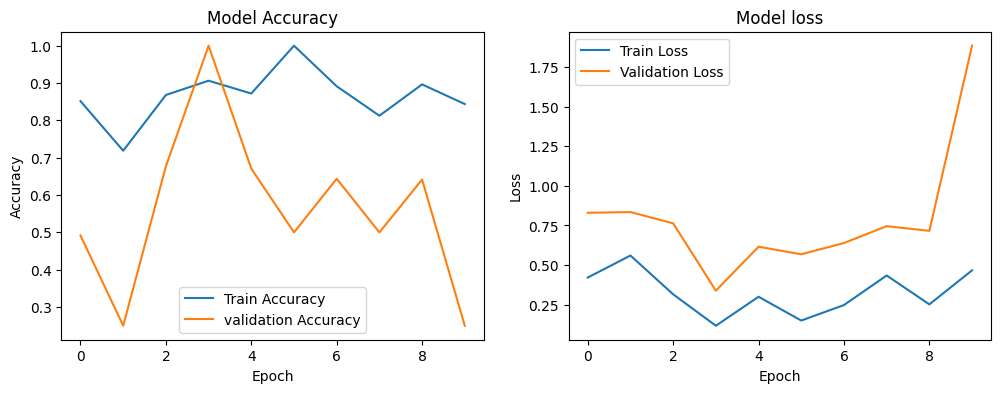

In [18]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')
plt.legend()

plt.show()

In [ ]:
# Step 6: Visualization of Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


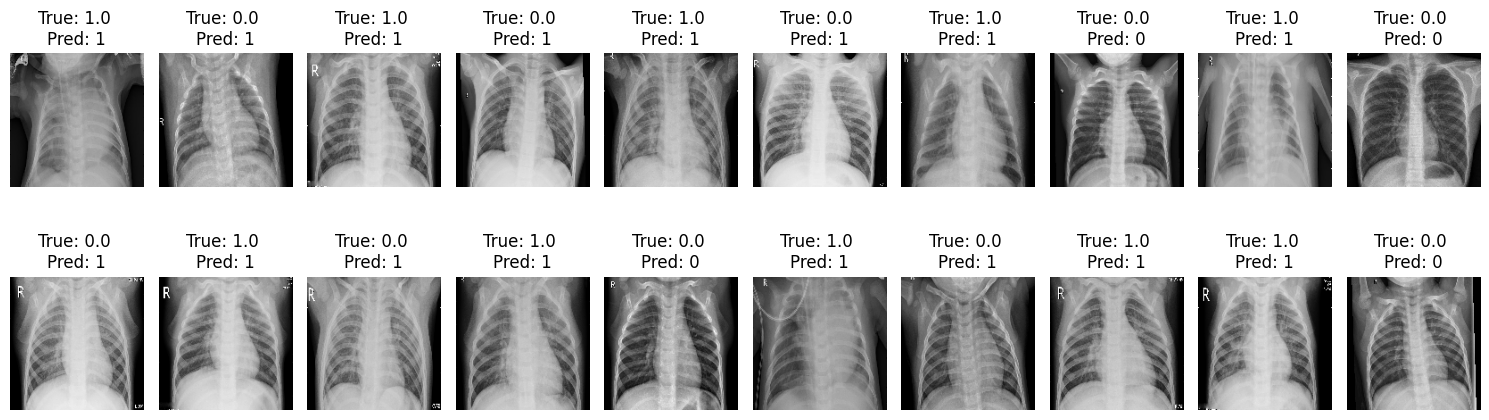

In [20]:
def plot_predictions(generator, num_images=20):
    images, labels = next(generator)
    
    predictions = model.predict(images)
    predicted_classes = (predictions > 0.5).astype("int32").flatten() 
    
    true_classes = labels.flatten()
    
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {true_classes[i]} \nPred: {predicted_classes[i]}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

plot_predictions(test_generator)
